# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [171]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

Now we can load our dataset:

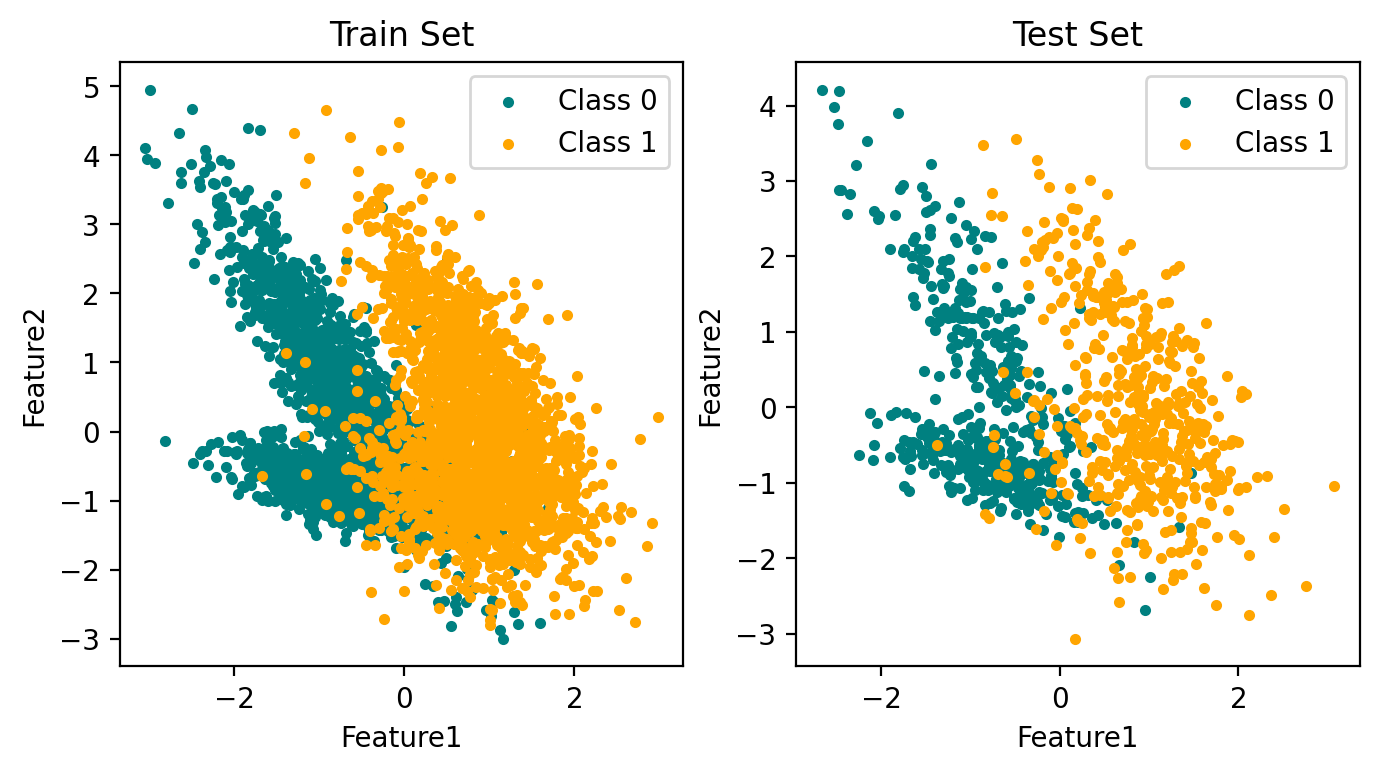

In [221]:
train_set = np.loadtxt("../lib/train.csv", delimiter=',', skiprows=1)
test_set = np.loadtxt("../lib/test.csv", delimiter=',', skiprows=1)

train_features = train_set[:, :-1]
train_labels = train_set[:, -1]
train_labels[train_labels == 0] = -1
train_class0 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == -1
]).T
train_class1 = np.array([
    train_features[i] for i in range(len(train_labels)) if train_labels[i] == 1
]).T

test_features = test_set[:, :-1]
test_labels = test_set[:, -1]
test_labels[test_labels == 0] = -1
test_class0 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == -1
]).T
test_class1 = np.array([
    test_features[i] for i in range(len(test_labels)) if test_labels[i] == 1
]).T

fig = plt.figure(figsize=(8, 4), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(train_class0[0], train_class0[1], label="Class 0", marker=".", c="teal")
ax1.scatter(train_class1[0], train_class1[1], label="Class 1", marker=".", c="orange")
ax1.set_title("Train Set")
ax1.set_xlabel("Feature1")
ax1.set_ylabel("Feature2")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(test_class0[0], test_class0[1], label="Class 0", marker=".", c="teal")
ax2.scatter(test_class1[0], test_class1[1], label="Class 1", marker=".", c="orange")
ax2.set_title("Test Set")
ax2.set_xlabel("Feature1")
ax2.set_ylabel("Feature2")
ax2.legend()

plt.show()

### Features Function

A useful function, that generates a feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree:

In [222]:
def features_matrix(features, degree):
    features = features.T
    result = []

    for i in range(0, degree + 1):
        for coeffs in polynomial_coefficients(len(features), i, 0):
            terms = [np.power(features[index], coeff) for index, coeff in enumerate(coeffs)]
            result.append(np.prod(terms, axis=0))
    
    return np.array(result).T

def polynomial_coefficients(terms, degree, index):
    result = []

    if index == terms - 1:
        return [[degree]]

    for i in range(degree, -1, -1):
        for coeff in polynomial_coefficients(terms, degree - i, index + 1):
            result.append([i] + coeff)

    return result

---

## Problem

### Predict Function

First, we define the **Perceptron** predict function using **Step Function**:

In [223]:
def predict_function(weights, features):
    return np.heaviside(features @ weights, 1) * 2 - 1

### Accuracy Function

Next, we define the **Accuracy Function**:

In [224]:
def accuracy_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs < 0] = 0

    return np.sum(costs) / len(features)

### Gradient Function

Next, we define the **Gradient Function**:

In [226]:
def gradient_function(weights, features, labels):
    predicts = predict_function(weights, features)

    costs = predicts * labels
    costs[costs > 0] = 0
    costs[costs < 0] = 1

    return -(costs * features * labels)[0]

### Train Function

Now, we use the direct algebraic way for computing the weights:

$$
\begin{aligned}
    & \Theta = (X^T X)^{-1} X^T Y
\end{aligned}
$$

In [231]:
def train_model(features, labels, learning_rate=0.001, epoch_count=1000, batch_size=1):
    data_set = np.append(features, np.array([labels]).T, 1)
    weights = np.ones(len(features[0]))
    history = np.zeros(epoch_count)

    for epoch in range(epoch_count):
        np.random.shuffle(data_set)

        batches = [
            data_set[batch * batch_size : (batch + 1) * batch_size]
            for batch in range(int(len(data_set) / batch_size))
        ]

        weights_temp = weights
        for batch in batches:
            gradient = gradient_function(weights_temp, batch[:, :-1], batch[:, -1])
            weights_temp = weights_temp - learning_rate * gradient

        accuracy_temp = accuracy_function(weights_temp, data_set[:, :-1], data_set[:, -1])
        accuracy = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])
        if (accuracy_temp > accuracy):
            weights = weights_temp

        history[epoch] = accuracy_function(weights, data_set[:, :-1], data_set[:, -1])

    return (weights, history)

### Train Models

In this section, we will use our predefined functions for training our models and computing cost values:

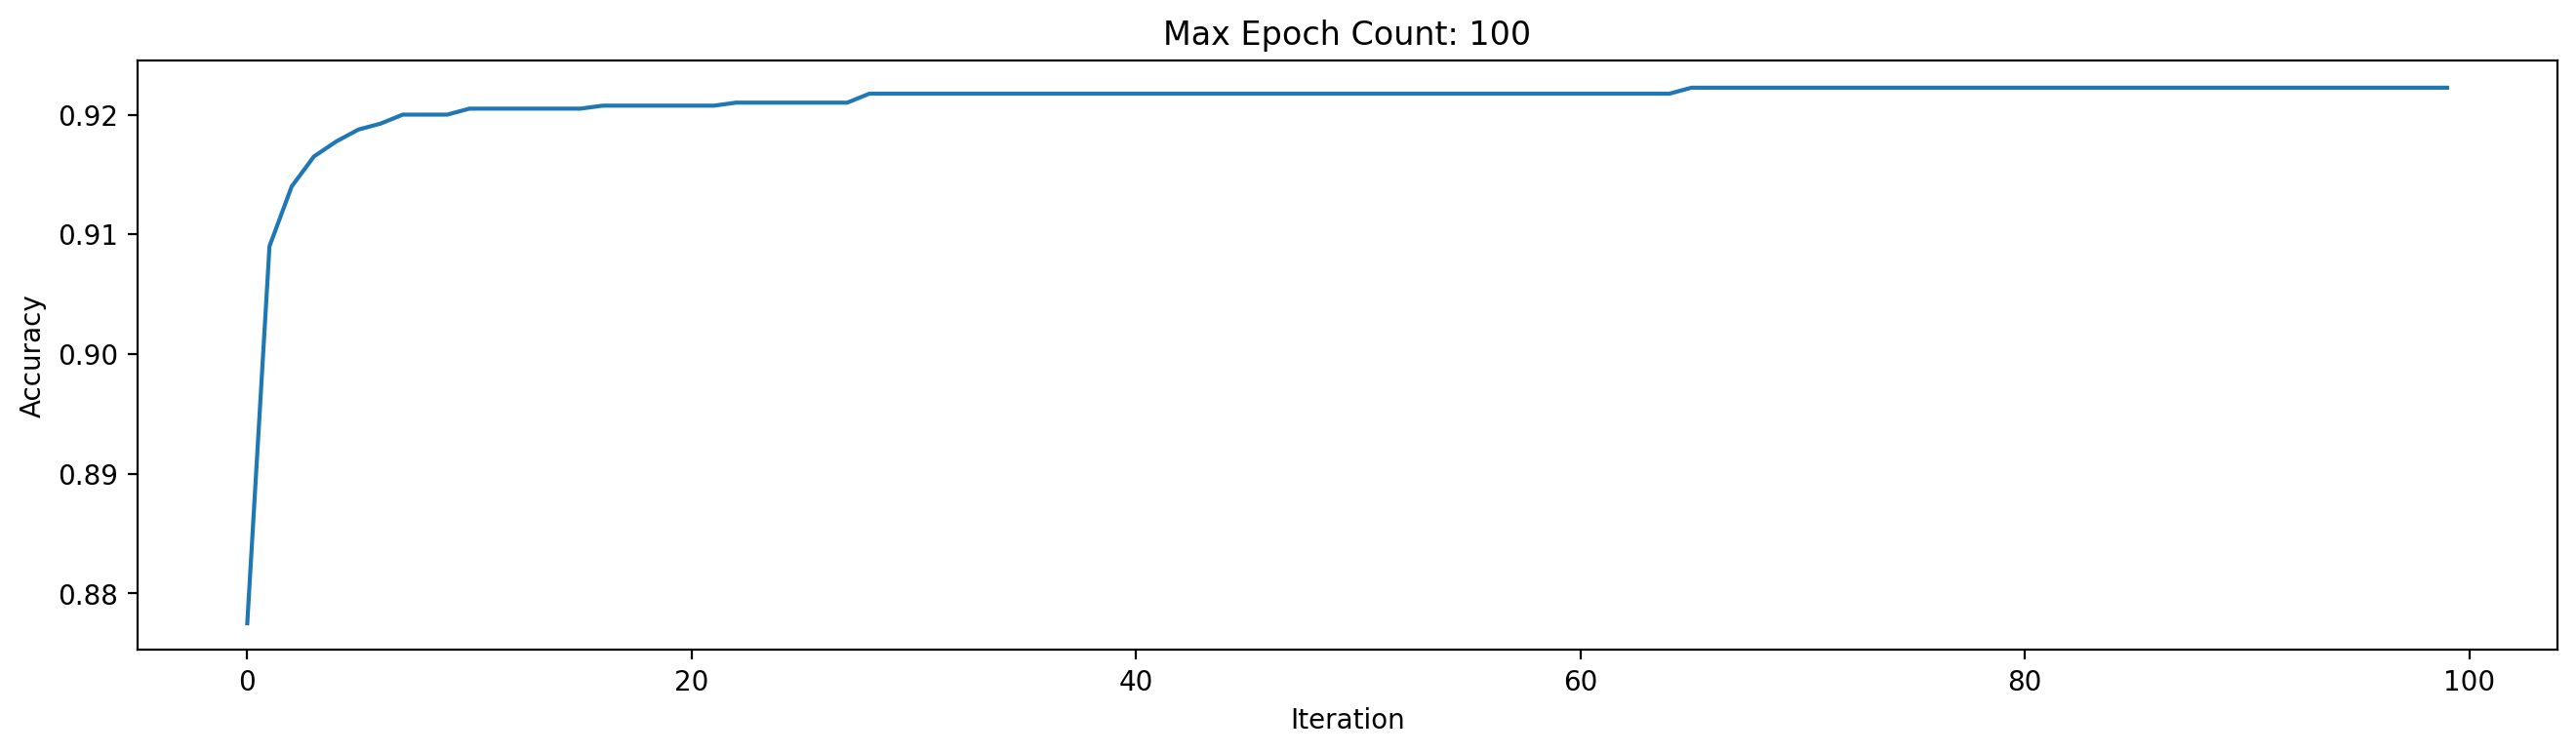

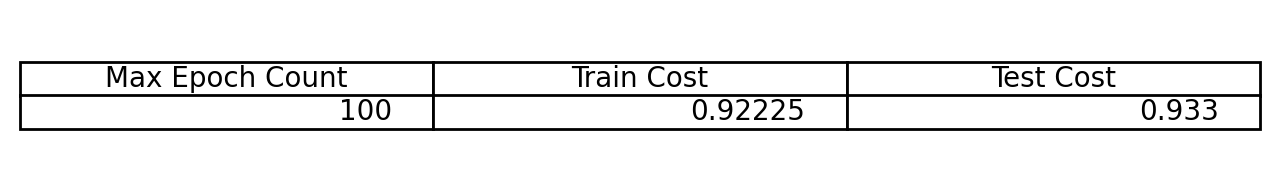

In [232]:
epoch_counts = [100]
costs = []

fig = plt.figure(figsize=(16, 4), dpi=200)

index = 0
for epoch_count in epoch_counts:
    index += 1
    (weights, history) = train_model(
        features_matrix(train_features, 1),
        train_labels,
        epoch_count=epoch_count
    )

    axis = fig.add_subplot(1, len(epoch_counts), index)
    axis.plot(range(0, len(history)), history)
    axis.set_title(f"Max Epoch Count: {epoch_count}")
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Accuracy")

    costs.append([
        epoch_count,
        accuracy_function(
            weights,
            features_matrix(train_features, 1),
            train_labels
        ),
        accuracy_function(
            weights,
            features_matrix(test_features, 1),
            test_labels
        )
    ])
plt.show()

plt.figure(figsize=(8, 1), dpi=200)
plt.table(cellText=costs, colLabels=["Max Epoch Count", "Train Cost", "Test Cost"], loc='center')
plt.axis("off")
plt.show()

### Results

As we can see, the error value for model of degree 1 is too high because it has **Underfitting** problem, the model with degree 3 is a **Good fit** because the actual model formula was from the degree of 3, and the model with degree 5 has introduced some additional errors because of **Overfitting** problem:

- **Degree 1**: Underfit
- **Degree 3**: Goodfit
- **Degree 5**: Overfit

---